# $$ Regression Model $$

## Objective -- Predict the Sales

# Importing required Library

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

# Reading the Data

In [2]:
sales=pd.read_csv("C:/Users/Lenovo/Documents/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Shape of Data

In [3]:
sales.shape

(14204, 12)

##### Data contains 12 Columns and 14204 Rows.

# 

### Information about Data

In [4]:
categorical=[]
numerical=[]
for i in sales:
    if sales[i].nunique()<40:
        categorical.append(i)
    else:
        numerical.append(i)

In [5]:
from tabulate import tabulate
table = [categorical, numerical]
print(tabulate({"Categorical":categorical,
                "continuous": numerical}, headers = ["categorical_Columns", "continuous_Columns"],tablefmt='grid'))

+---------------------------+----------------------+
| categorical_Columns       | continuous_Columns   |
+===========================+======================+
| Item_Fat_Content          | Item_Identifier      |
+---------------------------+----------------------+
| Item_Type                 | Item_Weight          |
+---------------------------+----------------------+
| Outlet_Identifier         | Item_Visibility      |
+---------------------------+----------------------+
| Outlet_Establishment_Year | Item_MRP             |
+---------------------------+----------------------+
| Outlet_Size               | Item_Outlet_Sales    |
+---------------------------+----------------------+
| Outlet_Location_Type      |                      |
+---------------------------+----------------------+
| Outlet_Type               |                      |
+---------------------------+----------------------+


#  

### Null Values and their treatment

In [6]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Extract the data having not null values for model Training and Testing

In [7]:
sales_notnull=sales[sales['Item_Outlet_Sales'].notnull()]
sales_null=sales[sales['Item_Outlet_Sales'].isnull()]
print('DF Shape without null Values ',sales_notnull.shape)
print('DF Shape with null Values', sales_null.shape)

DF Shape without null Values  (8523, 12)
DF Shape with null Values (5681, 12)


## $$\;\;\; Univariate \ Analysis $$

### Analysis of Categorical Culumns

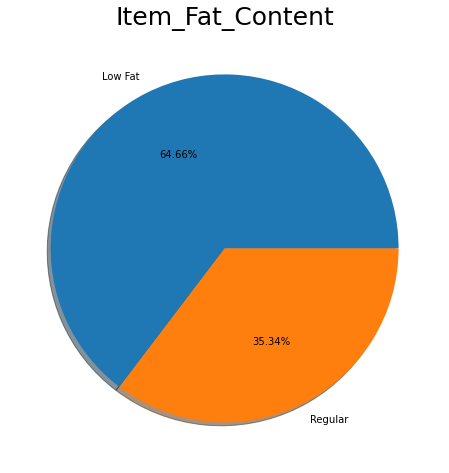



*****************************************************************************************************************************




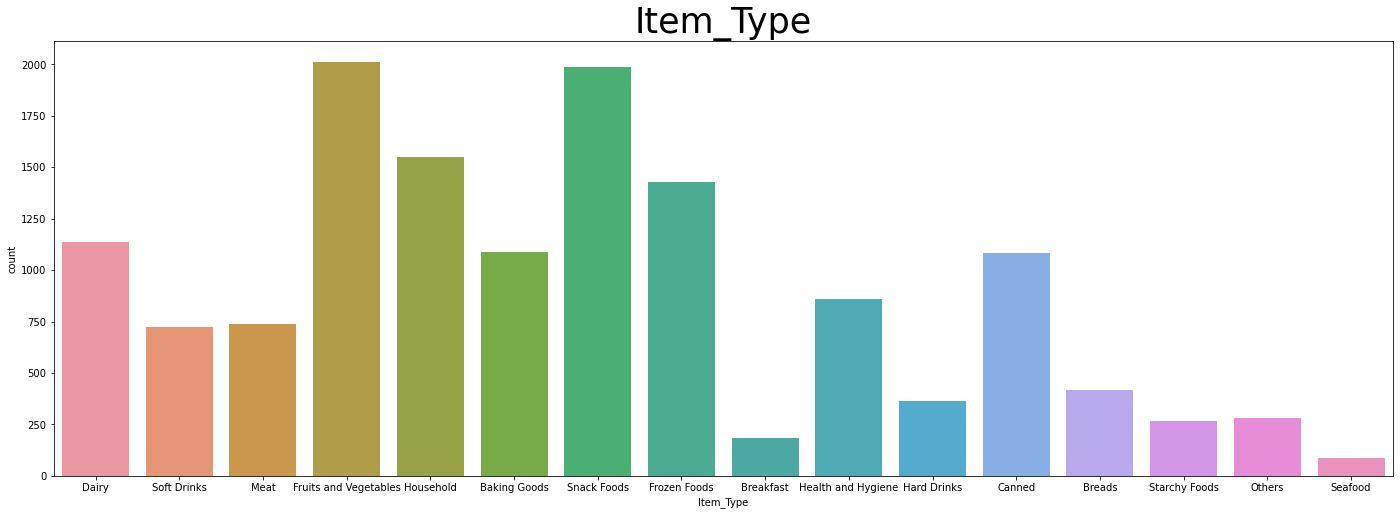



*****************************************************************************************************************************




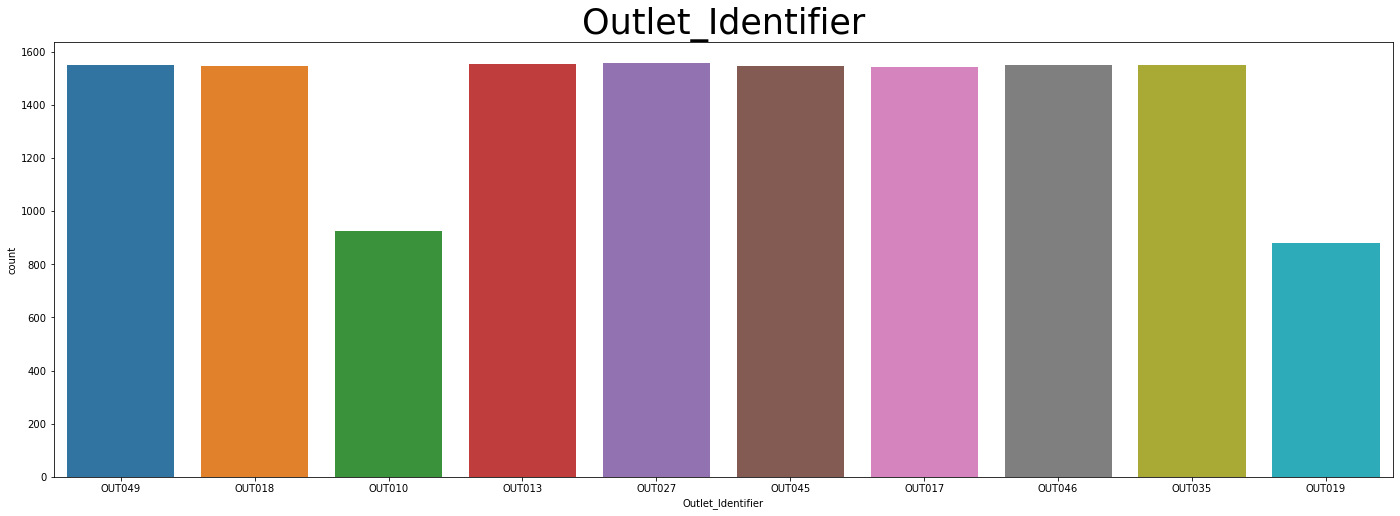



*****************************************************************************************************************************




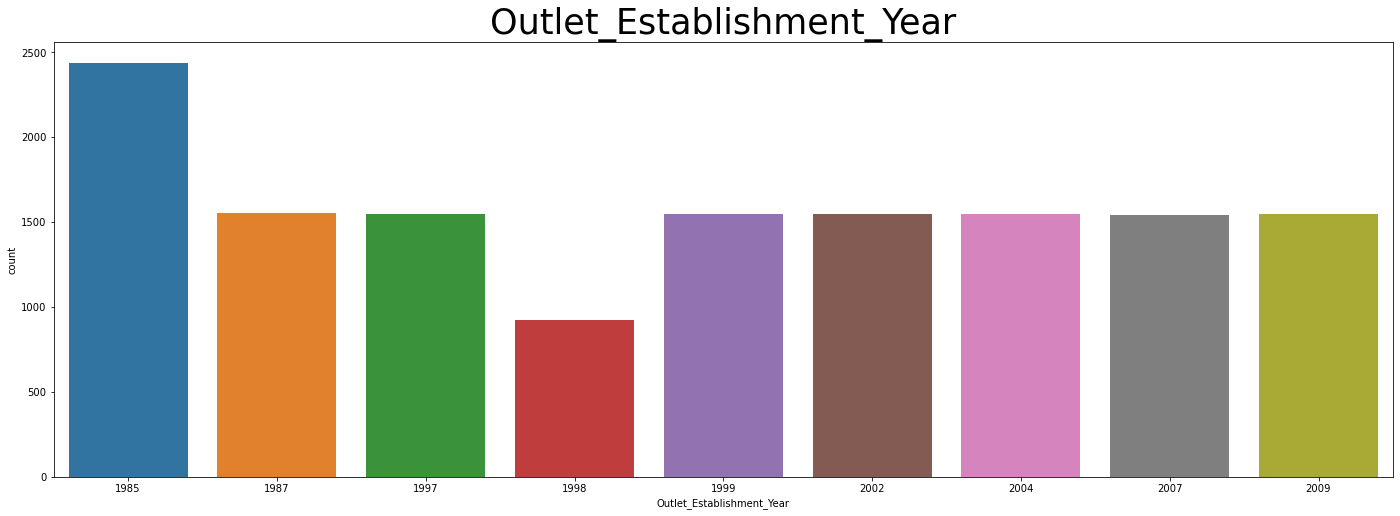



*****************************************************************************************************************************




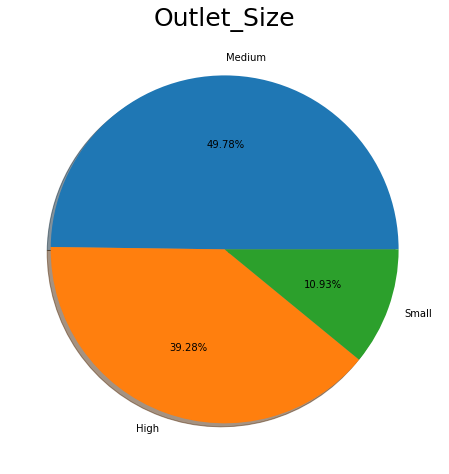



*****************************************************************************************************************************




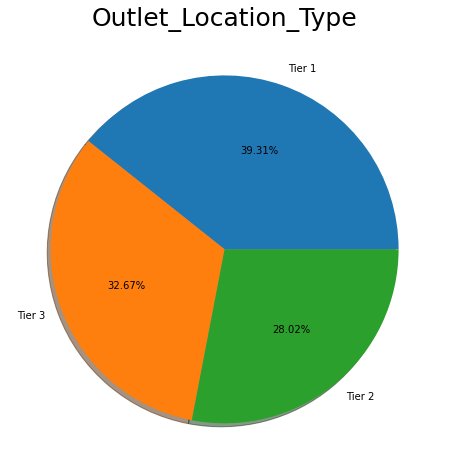



*****************************************************************************************************************************




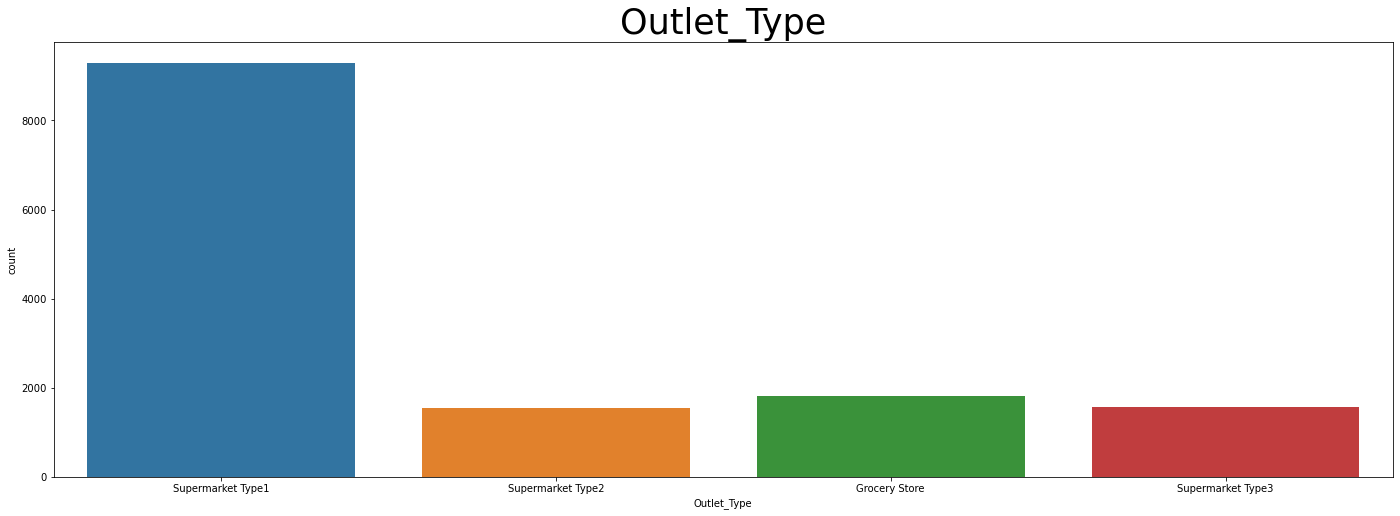



*****************************************************************************************************************************




In [8]:
for i in categorical:
    if sales[i].nunique()<=3:
        plt.figure(figsize=(8,8))
        plt.pie(sales[i].value_counts(),labels=sales[i].unique(),autopct="%0.2f%%",shadow=True)
        plt.title(i,fontsize=25)
        plt.show()
        print('\n')
        print('*****************************************************************************************************************************')
        print('\n')
    else:
        plt.figure(figsize=(24,8))
        sns.countplot(sales[i])
        plt.title(i,fontsize=35)
        plt.show()
        print('\n')
        print('*****************************************************************************************************************************')
        print('\n')

# $ Observations  $

##### 1 : For the Items-fat-Contetnt Low_fat items contains 65% of Items
##### 2: Fruits and Vegetable , Snack Foods items are mojority of Items
##### 3: 1985 Established Outlet having maximum number of sales
##### 4: 50% Outlet having medium size
##### 5: Around 40% of outlet have tier 2 Location
##### 6: Supermarket type 1 is the mojority outlet type










#  

## Analysis of Numerical columns

#  

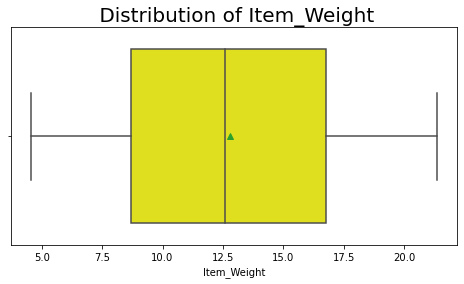



*****************************************************************************************************************************




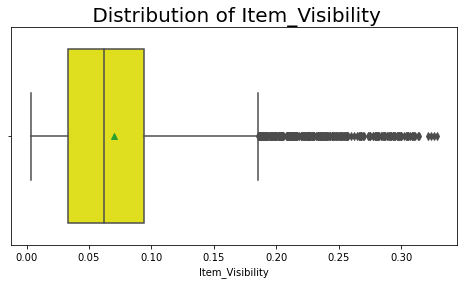



*****************************************************************************************************************************




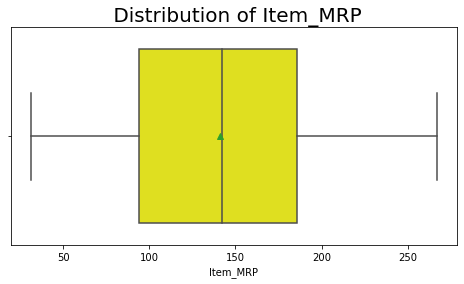



*****************************************************************************************************************************




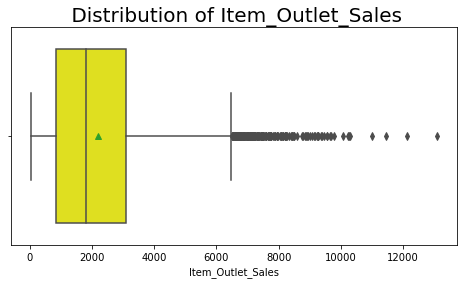



*****************************************************************************************************************************




In [9]:
for i in numerical:
    if i!='Item_Identifier':
        plt.figure(figsize=(8,4))
        sns.boxplot(sales[i],color='yellow',showmeans=True)
        plt.title(f' Distribution of {i}',fontsize=20)
        plt.show()
        print('\n')
        print('*****************************************************************************************************************************')
        print('\n')

# $ Observations  $

##### 1 : Most of the  items contains item-weight between 8.5 to 17
##### 2:  Most of the  items contains item-Visibility between 0.03 to 0.09
##### 3:  Most of the  items contains item-MRP between 90 to 180
##### 4:  Most of the  items contains item-Outlet -Sales between 1000 to 3000









#  

# $$\;\;\; Bivariate \ Analysis $$

## Categorical to Categorical

#  

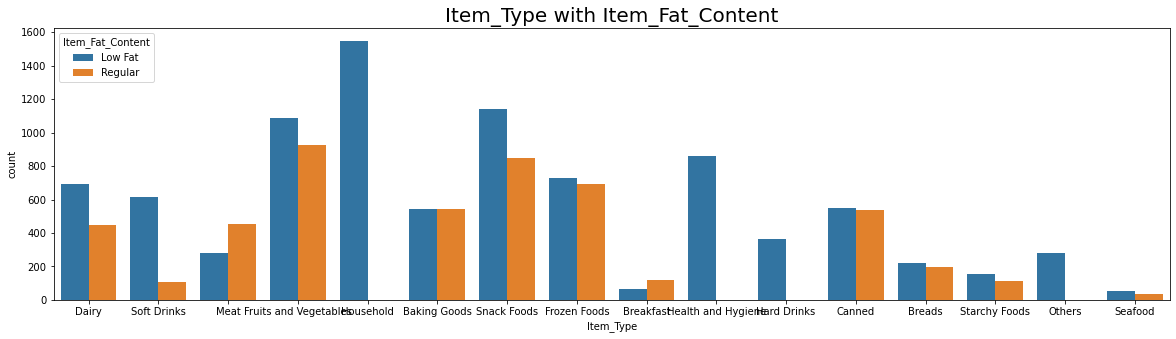



*****************************************************************************************************************************




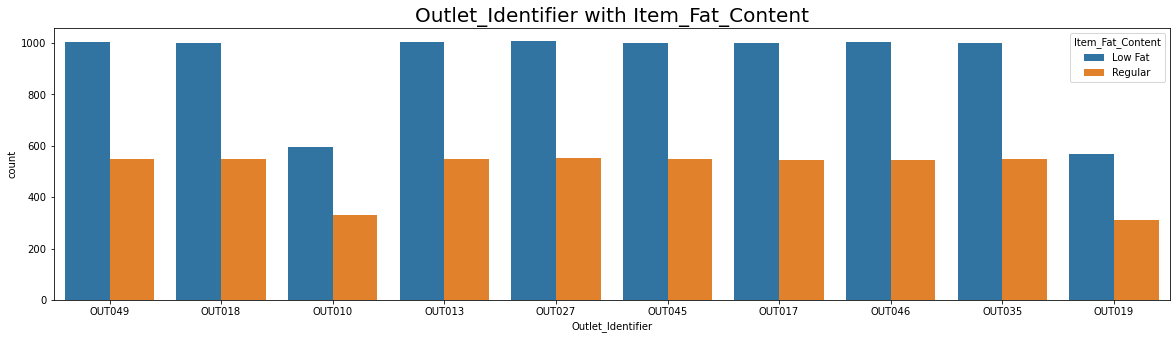



*****************************************************************************************************************************




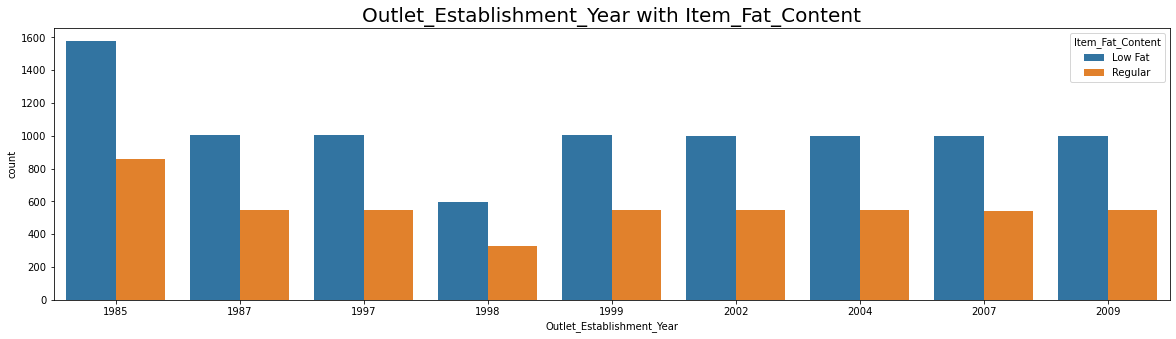



*****************************************************************************************************************************




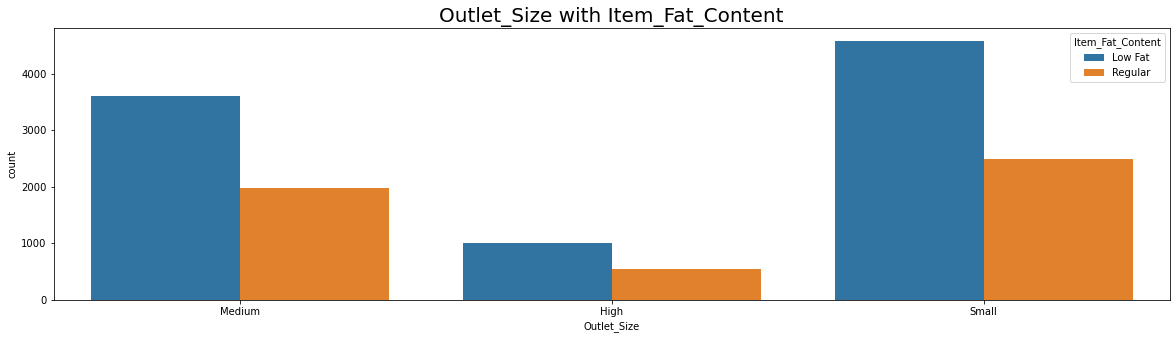



*****************************************************************************************************************************




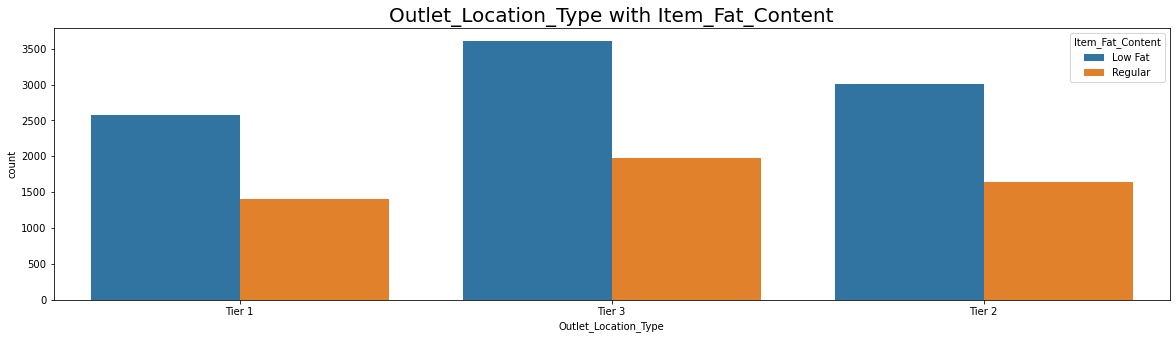



*****************************************************************************************************************************




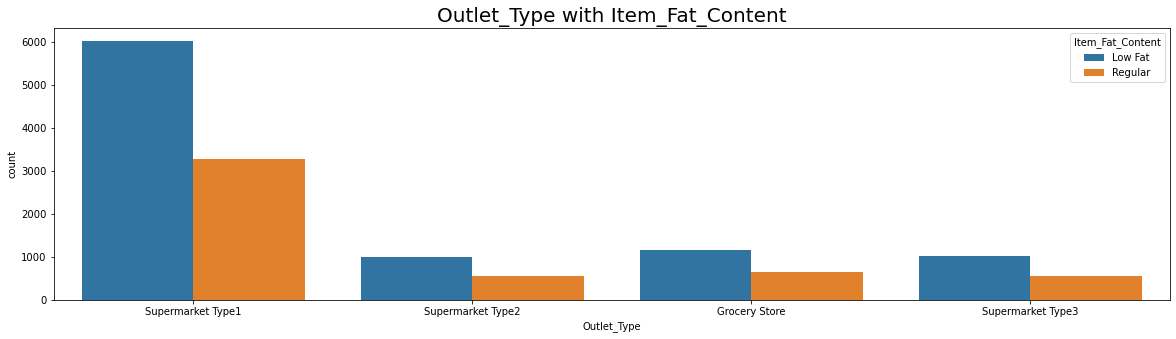



*****************************************************************************************************************************




In [10]:
for i in categorical:
    if i!='Item_Fat_Content':
        plt.figure(figsize=(20,5))
        sns.countplot(sales[i],hue=sales['Item_Fat_Content'])
        plt.title(f'{i} with Item_Fat_Content',fontsize=20)
        plt.show()
        print('\n')
        print('*****************************************************************************************************************************')
        print('\n')

## $ keypoints  $

##### 1. Supermarket Type 1 have maximum number of Low fat and Regular Fat items
##### 2. Location tier 3  have maximum number of Low fat and Regular Fat items
##### 3. Outlet size small  have maximum number of Low fat and Regular Fat items
##### 4. 1985 Outlet  have maximum number of Low fat and Regular Fat items

#  

## Categorical to numerical

#  

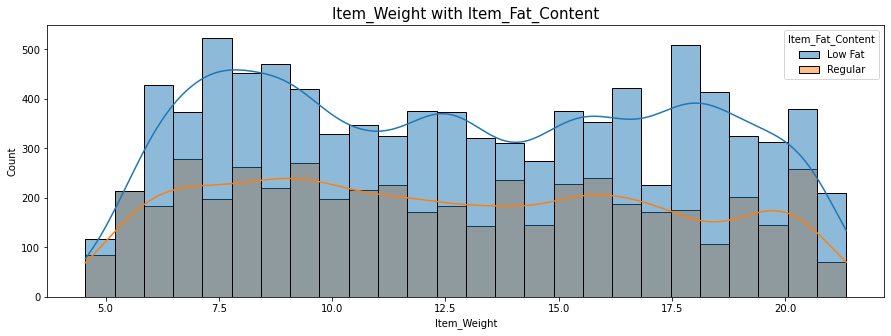



*****************************************************************************************************************************




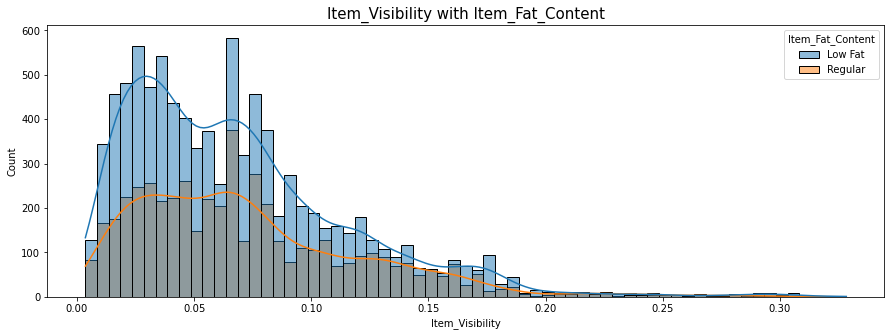



*****************************************************************************************************************************




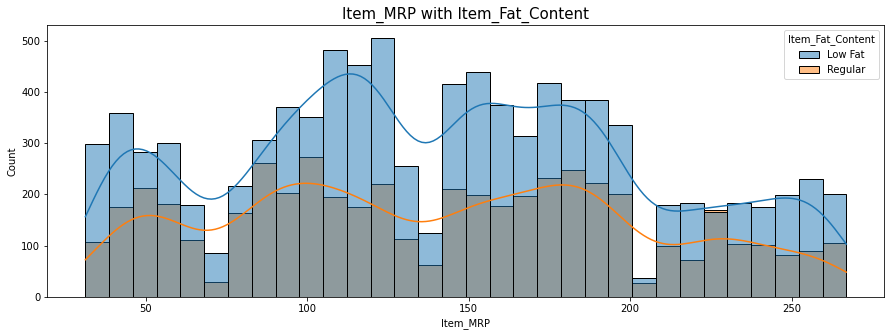



*****************************************************************************************************************************




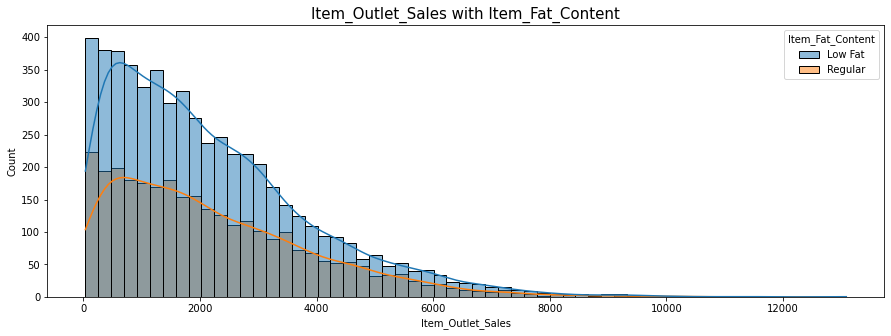



*****************************************************************************************************************************




In [11]:
for i in numerical:
    if i!='Item_Identifier':
        plt.figure(figsize=(15,5))
        sns.histplot(x = sales[i], hue = sales["Item_Fat_Content"],kde=True)
        plt.title(f'{i} with Item_Fat_Content',fontsize=15)
        plt.show()
        print('\n')
        print('*****************************************************************************************************************************')
        print('\n')

# $ keypoints  $

#### 1: Regular Fat  items contain more sales , weight , visibility and MRP than Low Fat content items

#  

## Numerical to Numerical

#  

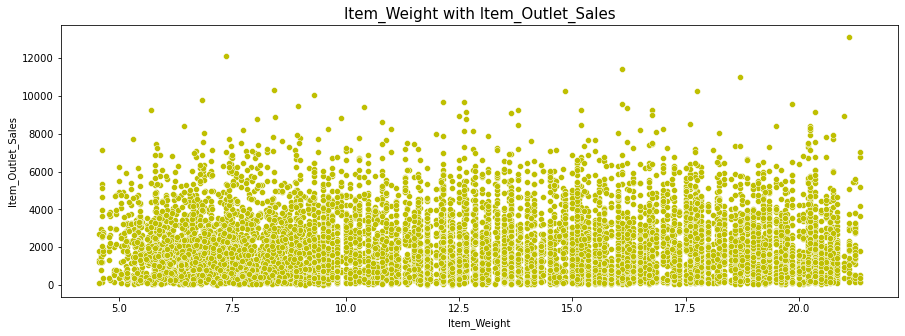

*****************************************************************************************************************************


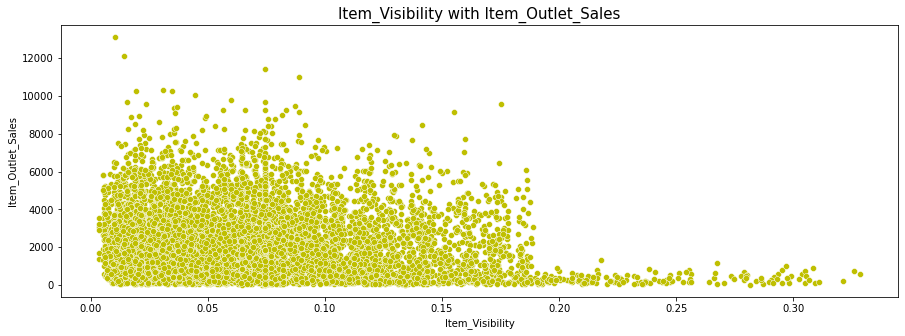

*****************************************************************************************************************************


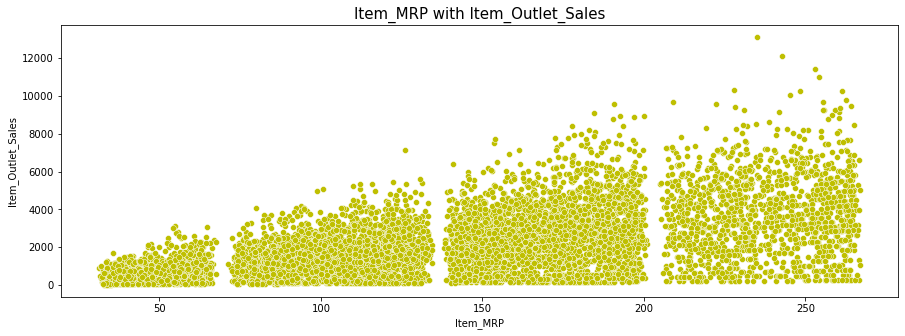

*****************************************************************************************************************************


In [12]:
for i in numerical:
    if i!='Item_Outlet_Sales' and i!='Item_Identifier':
        plt.figure(figsize=(15,5))
        sns.scatterplot(sales[i],sales['Item_Outlet_Sales'],color='y')
        plt.title(f'{i} with Item_Outlet_Sales',fontsize=15)
        plt.show()
        print('*****************************************************************************************************************************')

# $ keypoints  $

##### 1: As the Item_Visibiity is increasing Item_Outlet_Sales is decreasing
##### 2. As the Item_MRP is increasing Item_Outlet_Sales is also increasing

#  

# $$ Data Preprocessing  $$

In [13]:
sales_notnull.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
sales_notnull.drop('Item_Identifier',axis = 1,inplace=True)

##### Here I dropped the column because it is not important for our analysis

#  

# $ Feature Engineering $

### My data contains some categorical features and we have to convert them in numeric form

###  Label Encoding

In [15]:
Label=LabelEncoder()

#  

In [16]:
sales_notnull['Item_Fat_Content_']=Label.fit_transform(sales_notnull['Item_Fat_Content'])

sales_notnull['Item_Type_']=Label.fit_transform(sales_notnull['Item_Type'])

sales_notnull['Outlet_Identifier_']=Label.fit_transform(sales_notnull['Outlet_Identifier'])

sales_notnull['Outlet_Size_']=Label.fit_transform(sales_notnull['Outlet_Size'])

sales_notnull['Outlet_Location_Type_']=Label.fit_transform(sales_notnull['Outlet_Location_Type'])

sales_notnull['Outlet_Type_']=Label.fit_transform(sales_notnull['Outlet_Type'])

#  

In [17]:
sales_notnull.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.873623,4.645893,4.555000,8.785000,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.070479,0.048761,0.003575,0.033085,0.062517,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800
Item_Fat_Content_,8523.0,0.352693,0.477836,0.000000,0.000000,0.000000,1.000000,1.000000
Item_Type_,8523.0,7.226681,4.209990,0.000000,4.000000,6.000000,10.000000,15.000000
Outlet_Identifier_,8523.0,4.722281,2.837201,0.000000,2.000000,5.000000,7.000000,9.000000
Outlet_Size_,8523.0,1.388478,0.675514,0.000000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type_,8523.0,1.112871,0.812757,0.000000,0.000000,1.000000,2.000000,2.000000


#  

### Here we can see that different features have different scaling and to avoid the biasness in the model towards a feature having high scale values we do the feature scaling of our data

#  

### Feature Scaling

#### We used StandardScaler to push the mean of feature towards 0 and SD is 1 i.e. our all features are on same scale

In [18]:
scale=StandardScaler()

#  

In [19]:
df=sales_notnull.select_dtypes(np.number)
df_=scale.fit_transform(df)
scaled=pd.DataFrame(df_,columns=df.columns)

###  

In [20]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,6.168492e-16,1.000059,-1.790638,-0.880103,-0.058899,0.855941,1.824595
Item_Visibility,8523.0,-1.335185e-17,1.000059,-1.372163,-0.766916,-0.163298,0.494413,5.289634
Item_MRP,8523.0,-1.644427e-16,1.000059,-1.761688,-0.757431,0.032439,0.717037,2.021724
Outlet_Establishment_Year,8523.0,1.135381e-14,1.000059,-1.532846,-1.293934,0.139541,0.736822,1.334103
Item_Outlet_Sales,8523.0,1.631662e-16,1.000059,-1.258790,-0.789406,-0.226769,0.539151,6.391045
Item_Fat_Content_,8523.0,1.107800e-15,1.000059,-0.738147,-0.738147,-0.738147,1.354743,1.354743
Item_Type_,8523.0,1.025422e-16,1.000059,-1.716656,-0.766479,-0.291391,0.658786,1.846507
Outlet_Identifier_,8523.0,-2.622435e-16,1.000059,-1.664513,-0.959551,0.097891,0.802852,1.507813
Outlet_Size_,8523.0,-3.404267e-16,1.000059,-2.055561,-0.575119,-0.575119,0.905322,0.905322
Outlet_Location_Type_,8523.0,-6.574323e-16,1.000059,-1.369334,-1.369334,-0.138882,1.091569,1.091569


##  

### Feature Selection

<AxesSubplot:>

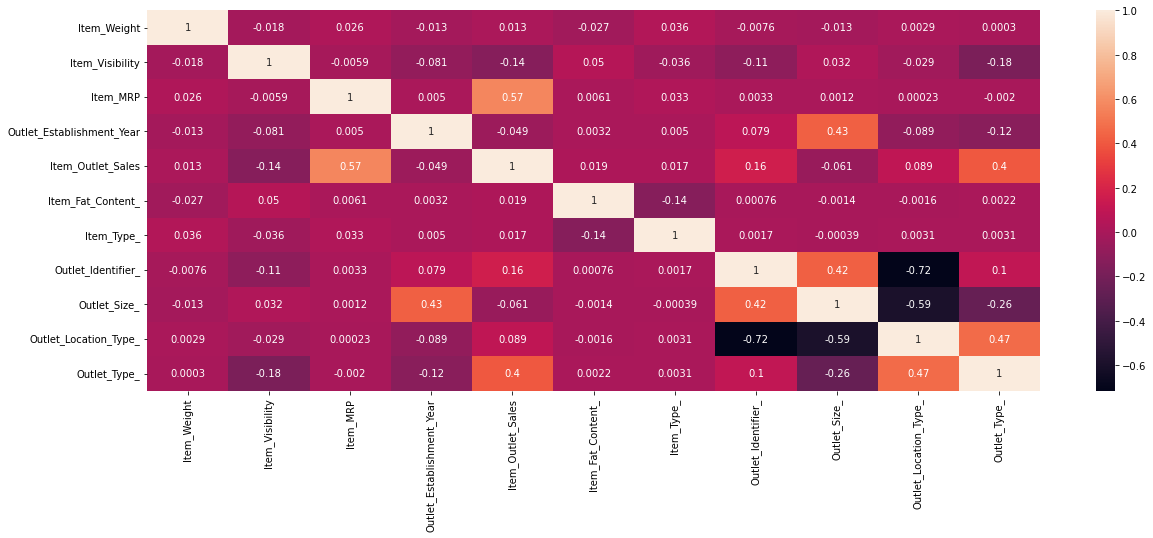

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(scaled.corr(),annot=True)

### Item_Visibility , Item_MRP , Outlet_Identifier , Outlet_size , Outlet_location_type_and Outlet type are more correlated with the Sales 

##  

In [22]:
Final=scaled[['Item_Visibility','Item_MRP','Outlet_Identifier_','Outlet_Size_','Outlet_Type_','Outlet_Location_Type_','Item_Outlet_Sales']]

###  

### Spliting the Data into Training - Testing

##### Independent Features

In [23]:
X = Final.drop('Item_Outlet_Sales',axis = 1)

##### Dependent Feature

In [24]:
y=Final['Item_Outlet_Sales']

#####  Spliting

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# $$ Model Making $$

# ---------------------------------------------------------------------------------------------------------------

### $$Linear Regression$$

####  Define model

In [26]:
linear_model = LinearRegression()

#### Train the model

In [27]:
linear_model.fit(X_train,y_train)

LinearRegression()

#### Predict the model

In [28]:
test_predictions1 = linear_model.predict(X_test)

In [29]:
test_predictions1

array([-0.72380701, -0.85148349, -0.74992099, ..., -1.08199884,
       -0.59735822, -0.31328905])

#### Evaluate the model

In [30]:
MAE = mean_absolute_error(y_test,test_predictions1)
MSE = mean_squared_error(y_test,test_predictions1)
RMSE = np.sqrt(MSE)

In [31]:
print('\nMean absolute error  is ',MAE)
print('\nMean squarred error  is ',MSE)
print('\nRoot mean squarred error is ',RMSE)
print('\nTraining R^2 value',linear_model.score(X_train,y_train))
print('\nTesting R^2 value ',linear_model.score(X_test,y_test))


Mean absolute error  is  0.5016552944087891

Mean squarred error  is  0.44673966815958266

Root mean squarred error is  0.6683858677138399

Training R^2 value 0.4970302370659406

Testing R^2 value  0.5214015598088475


In [32]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

# ---------------------------------------------------------------------------------------------------------

### $$Decision Tree Regressor$$

#### finding the best Hyperparamets

In [33]:
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_leaf= [5, 10, 20, 50, 100,200]

In [36]:
cv=KFold(n_splits=10)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= cv,
    scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.87
For max depth: 2
rmse= 0.75
For max depth: 3
rmse= 0.69
For max depth: 4
rmse= 0.65
For max depth: 5
rmse= 0.64
For max depth: 6
rmse= 0.64
For max depth: 7
rmse= 0.65
For max depth: 8
rmse= 0.66
For max depth: 9
rmse= 0.68
For max depth: 10
rmse= 0.69


In [37]:
for val in min_samples_leaf:
    score = cross_val_score(tree.DecisionTreeRegressor(min_samples_leaf= val, random_state= 42), X, y, cv= cv,
    scoring="neg_mean_squared_error")
    print(f'For min_samples_leaf: {val}')
    rmse(score.mean())

For min_samples_leaf: 5
rmse= 0.75
For min_samples_leaf: 10
rmse= 0.70
For min_samples_leaf: 20
rmse= 0.67
For min_samples_leaf: 50
rmse= 0.65
For min_samples_leaf: 100
rmse= 0.64
For min_samples_leaf: 200
rmse= 0.64


#### Define the model

In [38]:
Decision=DecisionTreeRegressor(max_depth=5,min_samples_leaf=200)

#### Train the model

In [39]:
Decision.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=200)

#### Predictions

In [40]:
test_predictions2 = Decision.predict(X_test)

#### Model Evaluation

In [41]:
MAE = mean_absolute_error(y_test,test_predictions2)
MSE = mean_squared_error(y_test,test_predictions2)
RMSE = np.sqrt(MSE)

In [42]:
print('\nMean absolute error  is ',MAE)
print('\nMean squarred error  is ',MSE)
print('\nRoot mean squarred error is ',RMSE)
print('\nTraining R^2 value',Decision.score(X_train,y_train))
print('\nTesting R^2 value ',Decision.score(X_test,y_test))


Mean absolute error  is  0.42755950878409066

Mean squarred error  is  0.3729099121743359

Root mean squarred error is  0.610663501590144

Training R^2 value 0.5814428527721083

Testing R^2 value  0.6004964075974938


# --------------------------------------------------------------------------------------------------------------

### $$Random Forest Regression$$

#### finding the hyperparameters for Random Forest

In [43]:
for val in max_depth:
    score = cross_val_score(RandomForestRegressor(max_depth= val, random_state= 42), X, y, cv= cv,
    scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.87
For max depth: 2
rmse= 0.74
For max depth: 3
rmse= 0.68
For max depth: 4
rmse= 0.64
For max depth: 5
rmse= 0.63
For max depth: 6
rmse= 0.63
For max depth: 7
rmse= 0.64
For max depth: 8
rmse= 0.64
For max depth: 9
rmse= 0.64
For max depth: 10
rmse= 0.64


In [44]:
for val in min_samples_leaf:
    score = cross_val_score(RandomForestRegressor(min_samples_leaf= val, random_state= 42), X, y, cv= cv,
    scoring="neg_mean_squared_error")
    print(f'For min_samples_leaf: {val}')
    rmse(score.mean())

For min_samples_leaf: 5
rmse= 0.65
For min_samples_leaf: 10
rmse= 0.64
For min_samples_leaf: 20
rmse= 0.64
For min_samples_leaf: 50
rmse= 0.63
For min_samples_leaf: 100
rmse= 0.64
For min_samples_leaf: 200
rmse= 0.65


#### Define the model

In [45]:
Random=RandomForestRegressor(max_depth=5,min_samples_leaf=50)

#### Train the model

In [46]:
Random.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=50)

#### predictions

In [47]:
test_predictions3 = Random.predict(X_test)

#### Model Evaluation

In [48]:
MAE = mean_absolute_error(y_test,test_predictions3)
MSE = mean_squared_error(y_test,test_predictions3)
RMSE = np.sqrt(MSE)

In [49]:
print('\nMean absolute error  is ',MAE)
print('\nMean squarred error  is ',MSE)
print('\nRoot mean squarred error is ',RMSE)
print('\nTraining R^2 value',Random.score(X_train,y_train))
print('\nTesting R^2 value ',Random.score(X_test,y_test))


Mean absolute error  is  0.420025914089936

Mean squarred error  is  0.35716590652892083

Root mean squarred error is  0.5976335888560154

Training R^2 value 0.6044940657085182

Testing R^2 value  0.6173631805332804


# --------------------------------------------------------------------------------------------------------

### $$KNN Regressor$$

#### Hyperparameters for model

In [50]:
knn = KNeighborsRegressor()

In [51]:
k_values = list(range(1,30))
param_grid = {'n_neighbors': k_values}

In [52]:
full_cv_classifier = GridSearchCV(knn,param_grid,cv=5,scoring='neg_mean_squared_error')

In [53]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [54]:
full_cv_classifier.best_params_

{'n_neighbors': 29}

#### Define and Train the model

In [55]:
knn_model = KNeighborsRegressor(n_neighbors=29)

In [56]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=29)

#### prediction and Model Evaluation

In [57]:
test_predictions4=knn_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions4)
MSE = mean_squared_error(y_test,test_predictions4)
RMSE = np.sqrt(MSE)

In [58]:
print('\nMean absolute error  is ',MAE)
print('\nMean squarred error  is ',MSE)
print('\nRoot mean squarred error is ',RMSE)
print('\nTraining R^2 value',knn_model.score(X_train,y_train))
print('\nTesting R^2 value ',knn_model.score(X_test,y_test))


Mean absolute error  is  0.4177085967101944

Mean squarred error  is  0.3578196717751849

Root mean squarred error is  0.5981803003904299

Training R^2 value 0.6112969173905747

Testing R^2 value  0.6166627927024835


# ----------------------------------------------------------------------------------------------------------

###  $$Stacking$$

#### Here is 3 Base models 

In [61]:
M1_pred = knn_model.predict(X_train)
M2_pred = Decision.predict(X_train)
M3_pred = Random.predict(X_train)

In [62]:
train_prediction = {
    'knn': M1_pred,
    'Decision_tree': M2_pred,
    'Random_forest': M3_pred
}
train_prediction = pd.DataFrame(train_prediction)
train_prediction

,knn,Decision_tree,Random_forest
0,0.203275,0.480896,0.413217
1,0.372101,0.480896,0.360387
2,-0.147724,-0.395108,-0.275311
3,-0.870738,-0.824339,-0.869693
4,0.331482,0.186471,0.164676
...,...,...,...
6813,-1.071976,-1.120939,-1.106799
6814,-0.489830,-0.595165,-0.618815
6815,1.003921,1.094176,1.027582
6816,-0.155998,-0.090507,-0.137864


### Meta Model

In [63]:
smodel = LinearRegression()

#### We have to train Meta Models on the training predictions of Base models

In [64]:
smodel.fit(train_prediction, y_train)

LinearRegression()

In [65]:
print('\nr^2 score for Training Data ',smodel.score(train_prediction, y_train))


r^2 score for Training Data  0.613299872433688


In [66]:
M1_pred_Test = knn_model.predict(X_test)
M2_pred_Test = Decision.predict(X_test)
M3_pred_Test = Random.predict(X_test)

In [67]:
test_prediction = {
    'knn': M1_pred_Test,
    'Decision': M2_pred_Test,
    'Random': M3_pred_Test
}
test_prediction = pd.DataFrame(test_prediction)
test_prediction

,knn,Decision,Random
0,-0.581347,-0.395108,-0.535049
1,-0.767273,-0.824339,-0.868763
2,-0.847650,-0.824339,-0.868763
3,1.853030,1.691011,1.488333
4,0.708045,0.480896,0.554741
...,...,...,...
1700,-0.089789,-0.090507,-0.058441
1701,-0.079833,0.186471,0.134361
1702,-0.882403,-0.912499,-0.873375
1703,-0.817014,-0.912499,-0.864329


#### We have to make  predictions on  the predictions of base models on test data

In [68]:
final_prediction = smodel.predict(test_prediction) 

In [69]:
print('\nr^2 score for Training Data ',smodel.score(test_prediction, y_test))


r^2 score for Training Data  0.6204325534166187


# -------------------------------------------------------------------------------------------------------

### Comparision

In [70]:
R_Square=[r2_score(y_test,test_predictions1),r2_score(y_test,test_predictions2),r2_score(y_test,test_predictions3),knn_model.score(X_test,y_test),r2_score(y_test,final_prediction)]
rmse=[0.6683858677138399,0.610663501590144,0.5976335888560154,0.5981803003904299,0.5781803003904299]
Models=['Linear_Model','Decision_Model','Random_Model','KNN Model','Meta model']

In [72]:
print(tabulate({"A":Models,
                "B": R_Square,'C':rmse}, headers = ["Regression Models", "R-Square Value",'RMSE'],tablefmt='grid'))

+---------------------+------------------+----------+
| Regression Models   |   R-Square Value |     RMSE |
+=====================+==================+==========+
| Linear_Model        |         0.521402 | 0.668386 |
+---------------------+------------------+----------+
| Decision_Model      |         0.600496 | 0.610664 |
+---------------------+------------------+----------+
| Random_Model        |         0.617363 | 0.597634 |
+---------------------+------------------+----------+
| KNN Model           |         0.616663 | 0.59818  |
+---------------------+------------------+----------+
| Meta model          |         0.620433 | 0.57818  |
+---------------------+------------------+----------+


## Stacked Meta model (Linear Regression) is the best for Sales Prediction as per highest                     R-Squarred Value and Lowest RMSE

# ==========================================================

#  

# $$ Prediction  $$

In [ ]:
sales_null.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1,inplace=True)

In [ ]:
sales_null['Item_Fat_Content']=Label.fit_transform(sales_null['Item_Fat_Content'])

sales_null['Item_Type']=Label.fit_transform(sales_null['Item_Type'])

sales_null['Outlet_Identifier']=Label.fit_transform(sales_null['Outlet_Identifier'])

sales_null['Outlet_Size']=Label.fit_transform(sales_null['Outlet_Size'])

sales_null['Outlet_Location_Type']=Label.fit_transform(sales_null['Outlet_Location_Type'])

sales_null['Outlet_Type']=Label.fit_transform(sales_null['Outlet_Type'])

In [ ]:
Final1=sales_null[['Item_Visibility','Item_MRP','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type']]

In [ ]:
linear_model.predict(Final1)